# Exercise 1

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [58]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras import utils
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout,Input, concatenate, BatchNormalization
from keras.callbacks import ModelCheckpoint

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

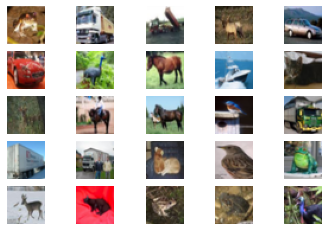

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [4]:
X_train =  np.float32(X_train)
X_test =   np.float32(X_test)
X_train /= 255
X_test /=  255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## A

In [26]:
visible = Input(shape=X_train.shape[1:])
conv1 = Conv2D(32, kernel_size=(3,3), padding="same", activation="relu")(visible)
conv2 = Conv2D(32, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1 = MaxPooling2D(2)(conv2)
conv3 = Conv2D(32, kernel_size=(3,3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(2)(conv3)
flat = Flatten()(pool2)
output = Dense(10, activation="softmax")(flat)

model = Model(inputs=visible, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0   

In [28]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, batch_size=128, epochs=25,verbose=1, validation_data=(X_test,Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5679 - accuracy: 0.4376 - val_loss: 1.2818 - val_accuracy: 0.5483
Epoch 2/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1830 - accuracy: 0.5858 - val_loss: 1.1452 - val_accuracy: 0.5961
Epoch 3/25
50000/50000 [==============================] - 54s 1ms/step - loss: 1.0387 - accuracy: 0.6386 - val_loss: 1.0217 - val_accuracy: 0.6482
Epoch 4/25
50000/50000 [==============================] - 55s 1ms/step - loss: 0.9427 - accuracy: 0.6749 - val_loss: 0.9385 - val_accuracy: 0.6756
Epoch 5/25
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8779 - accuracy: 0.6977 - val_loss: 0.8908 - val_accuracy: 0.6938
Epoch 6/25
50000/50000 [==============================] - 56s 1ms/step - loss: 0.8322 - accuracy: 0.7150 - val_loss: 0.8862 - val_accuracy: 0.6964
Epoch 7/25
50000/50000 [==============================] - 57s 1ms/st

In [30]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.9130173603057862
Test accuracy: 0.7125999927520752


## B

In [68]:
visible = Input(shape=(32,32,3))

conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat1 = Flatten()(pool2)

conv3 = Conv2D(32, kernel_size=6, activation='relu')(visible)
drop3 = Dropout(0.2)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
conv4 = Conv2D(64, kernel_size=6, activation='relu')(pool3)
drop4 = Dropout(0.2)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
flat2 = Flatten()(pool4)

merge = concatenate([flat1, flat2])

hidden1 = Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2())(merge)
drop3 = Dropout(0.2)(hidden1)

output = Dense(10, activation='softmax')(drop3)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 30, 30, 32)   896         input_23[0][0]                   
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 27, 27, 32)   3488        input_23[0][0]                   
__________________________________________________________________________________________________
dropout_51 (Dropout)            (None, 30, 30, 32)   0           conv2d_60[0][0]                  
___________________________________________________________________________________________

In [69]:
checkpoint = ModelCheckpoint('model-4-{epoch:03d}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, batch_size=128, epochs=25,verbose=1, validation_data=(X_test,Y_test), callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.9580 - accuracy: 0.3112 - val_loss: 1.6600 - val_accuracy: 0.4297

Epoch 00001: val_accuracy improved from -inf to 0.42970, saving model to model-4-001.h5
Epoch 2/25
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5826 - accuracy: 0.4508 - val_loss: 1.5022 - val_accuracy: 0.5311

Epoch 00002: val_accuracy improved from 0.42970 to 0.53110, saving model to model-4-002.h5
Epoch 3/25
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4820 - accuracy: 0.4940 - val_loss: 1.4432 - val_accuracy: 0.5522

Epoch 00003: val_accuracy improved from 0.53110 to 0.55220, saving model to model-4-003.h5
Epoch 4/25
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4223 - accuracy: 0.5232 - val_loss: 1.3605 - val_accuracy: 0.5834

Epoch 00004: val_accuracy improved from 0.55220 to 0.58340, saving model to model-4-004.

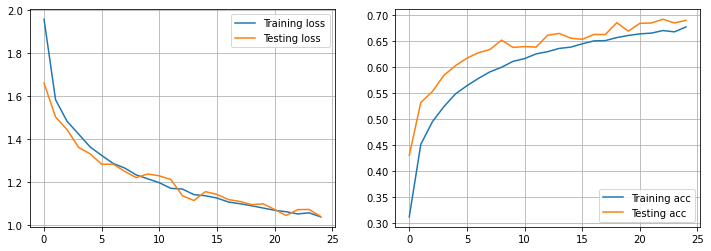

In [70]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(history.history['accuracy'], label='Training acc')
ax2.plot(history.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [71]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.0380285167694092
Test accuracy: 0.6891999840736389
